In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

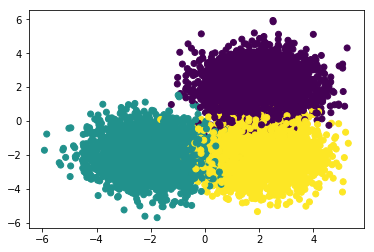

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


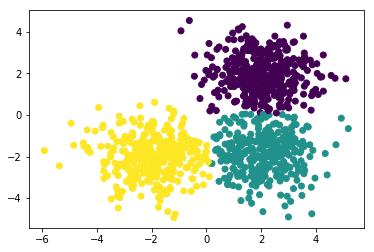

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

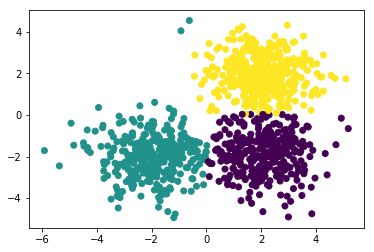

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       10    2  350
1        9  310    1
2      305    6    7


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


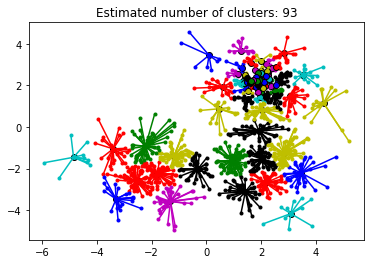

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

### Fewer datapoints

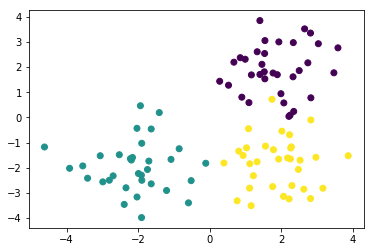

In [9]:
X, y = make_blobs(
    n_samples=100,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [18]:
# K-Means
from sklearn.cluster import KMeans

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0       0  34
1      33   0
2       4  29


In [19]:
# 3 Clusters for K-Means
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0   0   1   2
row_0            
0      34   0   0
1       0  32   1
2       1   0  32


K-Means identifies 3 clusters that closely match the data. When 2 clusters are used, each clearly favors a group from the data

In [13]:
# Mean Shift

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Number of estimated clusters: 6
Comparing the assigned categories to the ones in the data:
col_0  0  1  2  3  4  5
row_0                  
0      2  0  0  0  0  0
1      0  2  3  1  0  1
2      0  0  0  0  1  0


Mean shift established each generated cluster into one of the three groups from the data.

In [14]:
# Spectral Clustering

n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparing the assigned categories to the ones in the data:
col_0  0  1  2
row_0         
0      0  0  2
1      5  2  0
2      1  0  0


In [20]:
# Spectral Clustering

n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparing the assigned categories to the ones in the data:
col_0  0  1
row_0      
0      2  0
1      0  7
2      0  1


Spectral clustering also closely hews to the data points with both 2 and 3 clusters, although the reduced number of data points makes it less definitive

In [17]:
# Affinity Propagation

# Declare the model and fit it in one statement.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

#Predicted clusters.
predict=af.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))


Done
Estimated number of clusters: 4
Comparing the assigned categories to the ones in the data:
col_0  0  1  2  3
row_0            
0      2  0  0  0
1      0  2  0  5
2      0  0  1  0


Each cluster generated by Affinity Propagation clearly identifies as one of the three original classes from the data.

### More space between datapoints

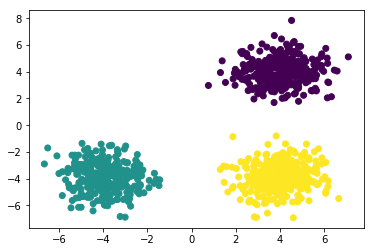

In [21]:
# The coordinates of the centers of our blobs.
centers = [[4, 4], [-4, -4], [4, -4]]

X, y = make_blobs(
    n_samples=1000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [22]:
# K-Means
from sklearn.cluster import KMeans

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      334    0
1        0  333
2      333    0


In [23]:
# 3 Cluster K-Means

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0        0  334    0
1      333    0    0
2        0    0  333


In [24]:
# Mean Shift

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Number of estimated clusters: 3
Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0       0  32   0
1       0   0  29
2      39   0   0


In [25]:
# Spectral Clustering

n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0       0   2  30
1      27   2   0
2       0  39   0


In [26]:
# Affinity Propagation

# Declare the model and fit it in one statement.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

#Predicted clusters.
predict=af.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))


Done
Estimated number of clusters: 3
Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0      32   0   0
1       0  29   0
2       0   0  39


Intuitively, it makes sense that defining data clusters that are further apart would make for more accurate models - there would be less uncertainty.  It is then interesting that the Spectral Clustering was not as accurate as the other models.  In that case, the errors favor the largest cluster.

This test also had more data points than my first group - more data points seem to make for more accurate clusters, but perhaps that's just the spacing.

### Tighter clusters

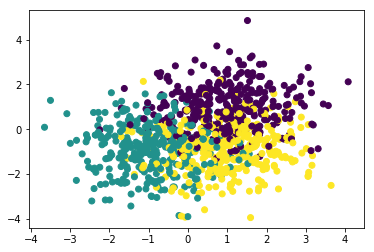

In [27]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1]]

X, y = make_blobs(
    n_samples=1000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [30]:
# 2 Cluster K-Means

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      305   29
1       28  305
2      176  157


In [29]:
# 3 Cluster K-Means

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0       24   36  274
1      269   46   18
2       45  227   61


Mismatching the number of clusters shows good accuracy with two clusters, but not with the third.

K-Means with 3 clusters shows good accuracy with each cluster, but there are still 10-20% of each data cluster that are misclassified by the model.

In [31]:
# Mean Shift

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Number of estimated clusters: 4
Comparing the assigned categories to the ones in the data:
col_0   0   1  2  3
row_0              
0      29   3  0  0
1       1  24  0  4
2      19  17  3  0


Interesting that Mean Shift generates four clusters, with two being very small (and specific to individual clusters from the data).  The other two are larger, are less accurate to the data.

In [32]:
# Spectral Clustering

n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0       5   1  26
1       6  22   1
2      20   8  11


In [33]:
# Spectral Clustering

n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3
row_0                
0      15  12   2   3
1       1   0  23   5
2       8  10   8  13


In [34]:
# Spectral Clustering

n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4
row_0                    
0       3   2  13  14   0
1       0  14   0   2  13
2      11  12   3   9   4


Spectral clustering again is less accurate, creating multiple clusters that contain datapoints from all three of the original data clusters.  But each of the created clusters generally favors one of the original group - most especially when the number of clusters generated is the same as the original data.

In [35]:
# Affinity Propagation

# Declare the model and fit it in one statement.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

#Predicted clusters.
predict=af.fit_predict(X_train)

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))


Done
Estimated number of clusters: 9
Comparing the assigned categories to the ones in the data:
col_0   0  1  2  3  4  5  6  7   8
row_0                             
0      11  5  3  0  0  2  0  0  11
1       0  0  4  8  1  0  6  9   1
2       3  1  6  3  6  9  3  1   7


Affinity Propagation seems least able to delineate the original clusters, which makes sense - exemplars from other clusters are more likely when the datapoints are close together.

### Conclusions

Some models work better with different structures of data.  Affinity Propagation is more effective when data points are more distinguishable (grouped further apart).  Mean-Shift is useful without a good guage of how many clusters to create.  The dimension reduction of Spectral Clustering makes it useful for high-dimension datapoints.  K-Means is a good all-purpose option.